<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_2_EDA_Chocolate_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocess

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')
 
def hasletornum(s):
    ls = [ch for ch in s]
    return any(list(map(lambda x: x.isalnum(), ls)))    
#cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')

def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    x = x.replace('DominicanRepublic', 'DomincanRepublic')

    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    ax.set_ylim(bottom=1.5,top=4.5)
    plt.show()

Mounted at /content/gdrive


In [2]:
cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')
display(cacao.sample())
cacao.columns = ['bar_id','company','specific_origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','broad_origin']
display(cacao.sample())

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
515,516,Davis,Ghana,1093,2013,70%,U.S.A.,2.5,Forastero,Ghana


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
481,482,,O'Payo,1666,2015,70%,U.K.,2.75,,Nicaragua


#bar_id

Number of unique bar_id's: 1795


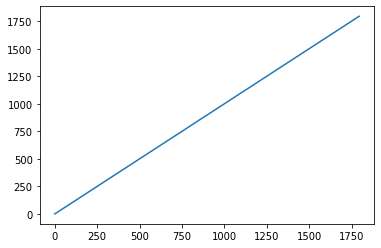

In [3]:
 print(f"Number of unique bar_id's: {cacao.bar_id.nunique()}")
plt.plot(cacao.bar_id)

In [4]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
cacao.sample()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
819,Holy Cacao,Gran Couva,1466,2015,70%,Israel,3.5,Trinitario,Trinidad


#Задание 2.3.1

In [5]:
print (f"Number of companies in the dataset + empty: {cacao.company.nunique()}")
 
cacao[cacao.company.apply (lambda x: hasletornum(x))].company.value_counts() #index.nunique()

Number of companies in the dataset + empty: 408


Soma                      45
Bonnat                    26
Fresco                    26
Pralus                    25
Domori                    22
                          ..
Chocablog                  1
Peppalo                    1
Kakao                      1
Ah Cacao                   1
Black River (A. Morin)     1
Name: company, Length: 407, dtype: int64

In [6]:
#cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
cacao.company = cacao.company.apply(lambda x: None if not(hasletornum(x)) else x)

In [22]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Chocablog,1
Peppalo,1
Kakao,1
Ah Cacao,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


#Задание 2.3.2

In [8]:
#cacao_ = cacao.copy()
print ("specific_origin data types:\n")
display (pd.DataFrame(cacao.specific_origin.apply(type).value_counts()))
print ()
 
valid_so = cacao.specific_origin[cacao.specific_origin.apply (lambda x: type(x) == str)]
valid_so = valid_so[valid_so.apply(hasletornum)]
 
print (f"Number of origins in the dataset: {valid_so.nunique()}\n")
valid_so.value_counts()

specific_origin data types:



,specific_origin
<class 'str'>,1795



Number of origins in the dataset: 1012



Madagascar                     55
Peru                           44
Ecuador                        39
Dominican Republic             33
Venezuela                      21
                               ..
Kaua'I, Alea Estate +world      1
Java, Indonesie                 1
Criollo, Dominican Republic     1
Ocumare, prototype              1
Trintade, Sao Tome              1
Name: specific_origin, Length: 1012, dtype: int64

Задание 2.3.3

In [31]:
 print(f"Number of origins met more than 10 times in the dataset: {(valid_so.value_counts() > 10).sum()}")

Number of origins met more than 10 times in the dataset: 15


#ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

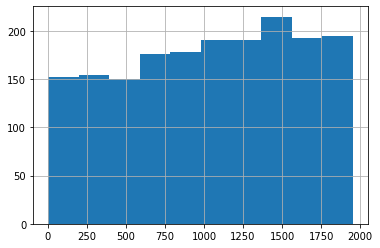

In [32]:
cacao.ref.hist()
cacao.ref.describe()

Анализ разброса ref:


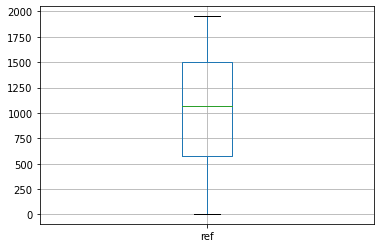

In [34]:
print ('Анализ разброса ref:')
cacao.boxplot(['ref']);

#cacao_percent

In [12]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

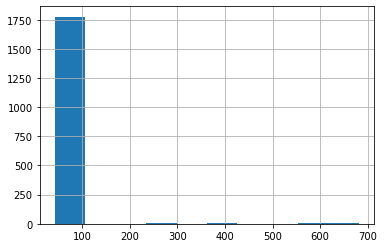

In [13]:
cacao.cocoa_percent.hist();
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


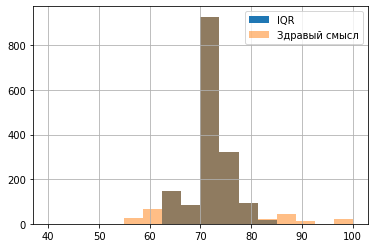

In [14]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

#company_location

In [15]:
display(pd.DataFrame(cacao.company_location))
pd.DataFrame(cacao.company_location.value_counts())

,company_location
0,France
1,France
2,France
3,France
4,France
...,...
1790,Austria
1791,Austria
1792,Austria
1793,Austria


,company_location
U.S.A.,764
France,156
Canada,125
U.K.,96
Italy,63
...,...
Russia,1
Ghana,1
Martinique,1
Wales,1


In [16]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum(),'\n')
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,764
France,156
Canada,125
U.K.,96
Italy,63
...,...
Russia,1
Ghana,1
Martinique,1
Wales,1


Значений, встретившихся в столбце более 10 раз: 22 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


#broad_origin
Задание 2.4.1


In [17]:
print ("broad_origin data types:\n")
display (pd.DataFrame(cacao.broad_origin.apply(type).value_counts()))
print ()

pd.DataFrame(cacao.broad_origin).info()

broad_origin data types:



,broad_origin
<class 'str'>,1794
<class 'float'>,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1794 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [18]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)
print ("broad_origin data types:\n")
display (pd.DataFrame(cacao.broad_origin.apply(type).value_counts()))

broad_origin data types:



,broad_origin
<class 'str'>,1794
<class 'float'>,1


In [19]:
#cacao_ = cacao.copy()

#cacao.broad_origin = cacao.broad_origin.astype(str)
cacao.broad_origin = cacao.broad_origin.apply(fix_countries) 
#cacao.broad_origin = cacao.broad_origin[cacao.broad_origin.apply (lambda x: type(x) == str)]
#cacao.broad_origin = cacao.broad_origin[cacao.broad_origin.apply(hasletornum)]
 
print (f"Number of origins in the dataset: {cacao.broad_origin.nunique()}\n")
print (f"Number of origins that occur > 10 times: {(cacao.broad_origin.value_counts() > 10).sum()}\n")
pd.DataFrame(cacao.broad_origin.value_counts()) #.head(97)

Number of origins in the dataset: 96

Number of origins that occur > 10 times: 25



,broad_origin
Venezuela,214
Ecuador,193
DomincanRepublic,166
Peru,166
Madagascar,145
...,...
"PapuaNewGuinea,Vanuatu,Madagascar",1
"Venezuela,Java",1
"Africa,Carribean,C.Am.",1
"Venezuela,Carribean",1


#2.5. Корреляционный анализ

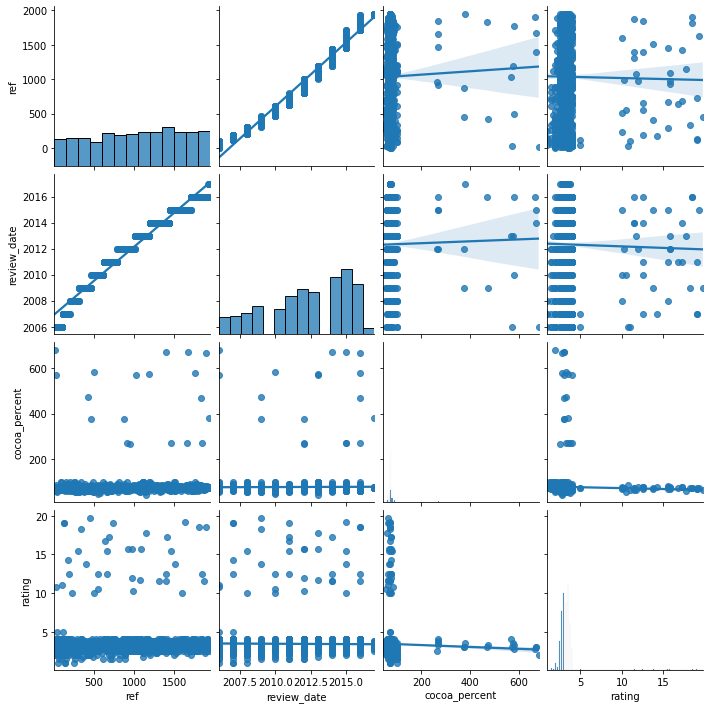

In [35]:
sns.pairplot(cacao, kind = 'reg');

In [21]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985076,0.019591,-0.009183
review_date,0.985076,1.000000,0.011111,-0.013980
cocoa_percent,0.019591,0.011111,1.000000,-0.030687
rating,-0.009183,-0.013980,-0.030687,1.000000


#2.6. Анализ номинативных переменных

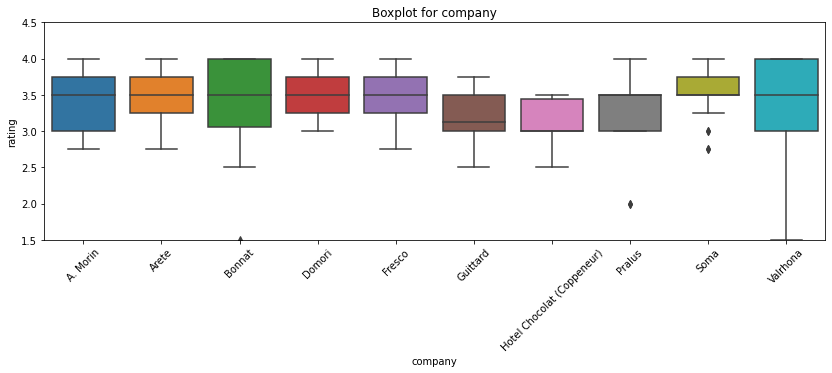

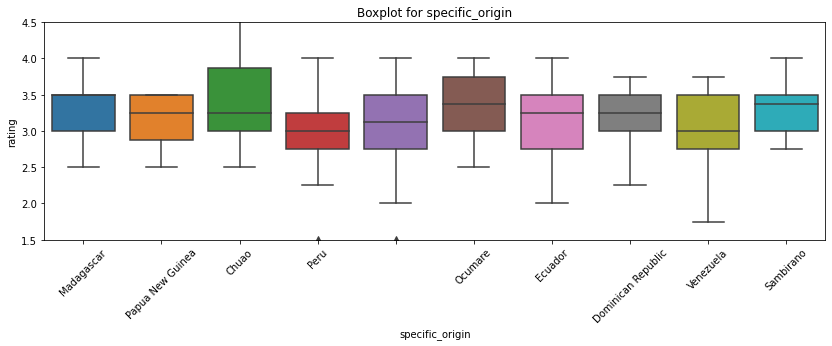

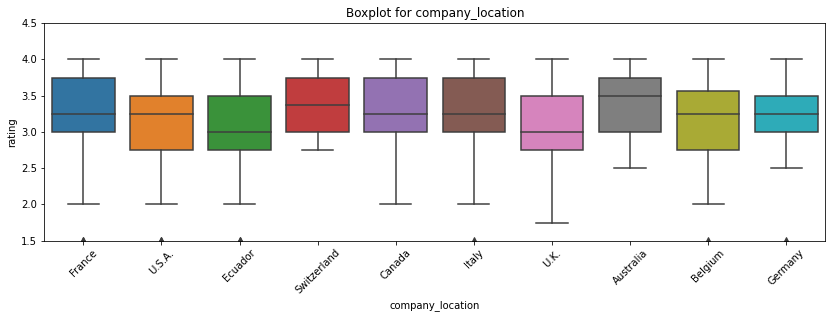

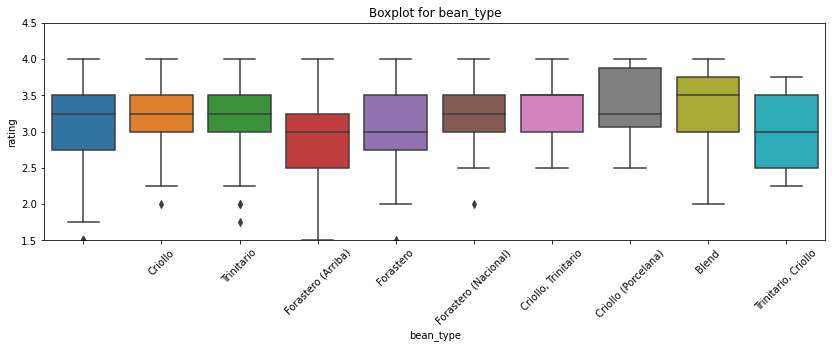

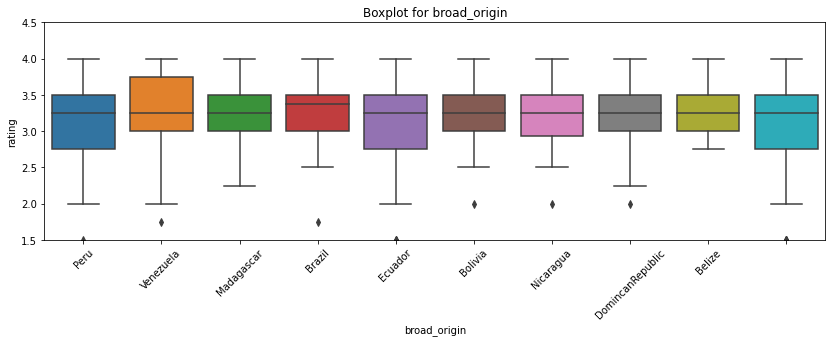

In [48]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)